## Finpro Stage 1 - EDA - installment payments

# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.1


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Data

In [4]:
# Load the data from the CSV file
data = pd.read_csv('/content/installments_payments.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674.0,1.0,6.0,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639.0,0.0,34.0,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053.0,2.0,1.0,-63.0,-63.0,25425.000,25425.000
3,2452527,199697.0,1.0,3.0,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756.0,1.0,2.0,-1383.0,-1366.0,2165.040,2160.585


# 1. Descriptive Statistics

In [ ]:
# Display info about the dataset
print("\nInfo about the dataset:")
data.info()


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
display(data.describe())


Descriptive statistics of the dataset:


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


## Pendekatan Numerik

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums= ['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']
#nums = numericals

In [ ]:
data[nums].describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


### A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

**Secara umum tipe datanya sudah sesuai isinya:**
Saran:<br>
kolom yang mungkin perlu diperbaiki adalah:<br>
**NUM_INSTALMENT_VERSION**, **DAYS_INSTALMENT**, dan **DAYS_ENTRY_PAYMENT** sebaiknya diperiksa untuk perubahan ke int64 jika tidak ada angka desimal yang diperlukan.<br>

### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [ ]:
#Jumlah data yang null
data.isna().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NUM_INSTALMENT_VERSION,0
NUM_INSTALMENT_NUMBER,0
DAYS_INSTALMENT,0
DAYS_ENTRY_PAYMENT,2905
AMT_INSTALMENT,0
AMT_PAYMENT,2905


Data yang memiliki nilai kosong ada pada **DAYS_ENTRY_PAYMENT** dan **AMT_PAYMENT**

### C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

Berdasarkan summary statistik yang diberikan, berikut adalah beberapa observasi terkait nilai yang tampak aneh atau tidak umum:<br>

Kolom NUM_INSTALMENT_VERSION:<br>
Nilai maksimum sebesar 178 tampaknya sangat tinggi untuk kolom yang kemungkinan mewakili versi angsuran (biasanya versi diharapkan dalam rentang kecil, seperti 1 atau 2). Sebaiknya periksa apakah nilai ini akurat atau apakah ini adalah outlier atau kesalahan data.<br>

Kolom DAYS_INSTALMENT dan DAYS_ENTRY_PAYMENT:<br>
Nilai minimum dari kedua kolom ini sangat negatif, yaitu -2922 dan -4921. Ini mungkin normal jika nilai tersebut merepresentasikan jumlah hari sebelum tenggat waktu atau keterlambatan, tetapi nilai yang sangat ekstrem seperti ini sebaiknya diperiksa lebih lanjut untuk memastikan tidak ada kesalahan input data.<br>

Kolom AMT_INSTALMENT dan AMT_PAYMENT:<br>
Nilai maksimum sebesar 3,771,488 dalam kedua kolom ini tampaknya sangat tinggi. Sementara beberapa pembayaran mungkin besar, angka ini jauh di atas rata-rata (sekitar 17,000). Perlu diperiksa apakah pembayaran sebesar ini wajar atau merupakan anomali dalam dataset.

Kolom NUM_INSTALMENT_NUMBER:<br>
Nilai maksimum sebesar 277 untuk nomor angsuran mungkin terlalu tinggi untuk program angsuran. Biasanya, program angsuran tidak memiliki jumlah angsuran sebanyak ini, dan sebaiknya diperiksa apakah ini benar atau ada kesalahan.<br>

Kesimpulan:<br>
- **NUM_INSTALMENT_VERSION** dengan nilai maksimum 178 mungkin perlu dievaluasi lebih lanjut.
- DAYS_INSTALMENT dan DAYS_ENTRY_PAYMENT dengan nilai minimum sangat negatif (hingga ribuan hari) juga patut diperiksa.
- **AMT_INSTALMENT** dan **AMT_PAYMENT** dengan nilai maksimum sangat tinggi perlu diperiksa untuk mengetahui apakah ini memang pembayaran yang valid.
- **NUM_INSTALMENT_NUMBER** dengan nilai maksimum 277 juga tampak aneh dan mungkin merupakan outlier.<br>

Perlu ada investigasi lebih lanjut untuk melihat apakah nilai-nilai ini merupakan outlier atau kesalahan dalam data.

# Exploratory Data Analysis (EDA)

# 2. Univariate Analysis (20 Poin)

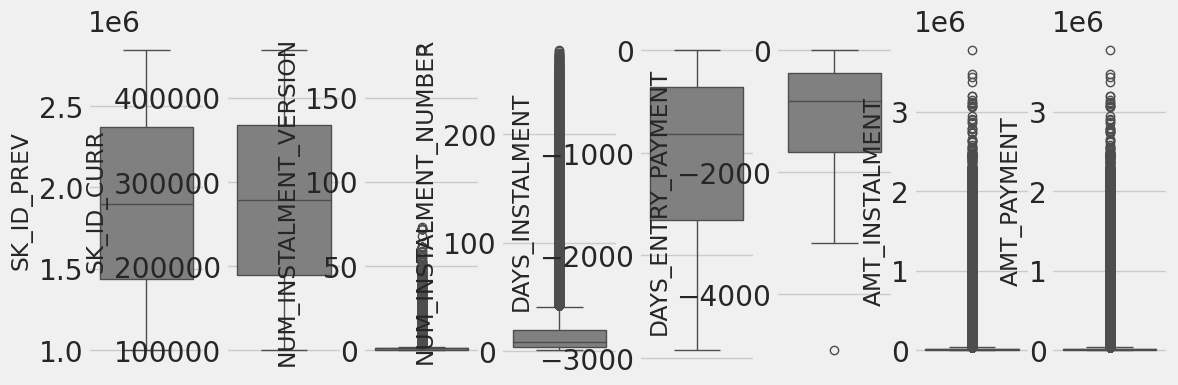

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

SK_ID_PREV dan SK_ID_CURR:<br>
Kolom ini menunjukkan distribusi ID unik, sehingga tidak memiliki makna distribusi seperti kolom numerik lainnya. Tidak ada hal yang perlu di-follow up terkait distribusi kolom ini karena hanya berfungsi sebagai identifikasi.<br>

NUM_INSTALMENT_VERSION:<br>
Distribusi dari kolom ini cenderung simetris, tetapi nilai-nilainya mendekati 0 dan tidak banyak menyebar. Ini menunjukkan bahwa kebanyakan transaksi berada di versi instalment yang rendah.<br>
Follow-up: Periksa apakah ada versi instalment yang jauh lebih tinggi dari yang lain karena mungkin ada beberapa anomali.<br>

NUM_INSTALMENT_NUMBER:<br>
Distribusi sangat skewed ke kanan (positively skewed) dengan sebagian besar nilai mendekati 0.
Follow-up: Perlu memeriksa nilai-nilai yang sangat tinggi dan apakah ada kesalahan input atau apakah itu wajar.<br>

DAYS_INSTALMENT dan DAYS_ENTRY_PAYMENT:<br>
Kedua kolom ini memiliki distribusi yang skewed negatif (banyak nilai rendah). Ada outlier di kedua kolom yang jauh dari nilai rata-rata.<br>
Follow-up: Outlier ini perlu ditinjau lebih lanjut untuk melihat apakah itu kesalahan atau memang ada data yang valid tetapi ekstrem.<br>

AMT_INSTALMENT dan AMT_PAYMENT:<br>
Kedua kolom ini memiliki distribusi skewed ke kanan (positively skewed) dengan beberapa outlier di bagian kanan.<br>
Follow-up: Nilai outlier ini perlu dieksplorasi lebih lanjut karena bisa jadi merupakan transaksi dengan jumlah yang sangat besar.<br>

**Rekomendasi Pre-Processing:** <br>

Lakukan analisis lebih lanjut pada outlier yang terdeteksi, terutama untuk kolom NUM_INSTALMENT_NUMBER, DAYS_INSTALMENT, dan AMT_PAYMENT.<br>
Normalisasi atau scaling pada kolom numerik yang distribusinya skewed.<br>
Pertimbangkan untuk menggunakan transformasi seperti log-transform jika distribusi terlalu skewed, untuk menormalkan distribusi.<br>

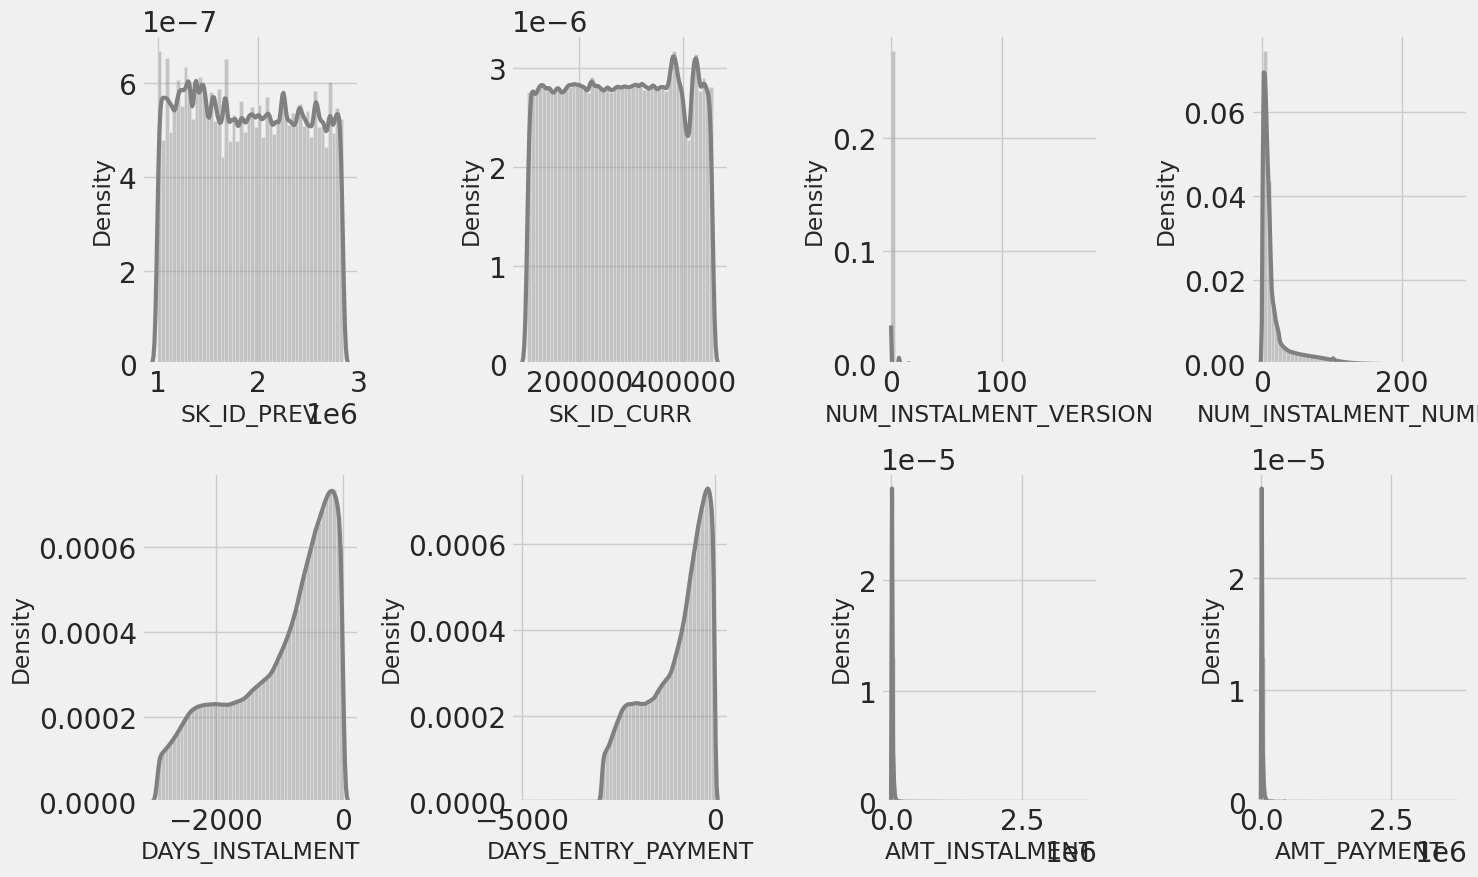

In [ ]:
plt.figure(figsize=(15, 9))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.distplot(data[nums[i]], color='gray')
    plt.tight_layout()

Berdasarkan visualisasi density plot dari gambar di atas, berikut adalah analisis distribusi masing-masing kolom:<br>

SK_ID_PREV dan SK_ID_CURR:<br>
Distribusi ID pada kedua kolom ini cenderung merata (flat) yang menunjukkan bahwa masing-masing ID memiliki frekuensi yang hampir sama.<br>
Tidak ada yang perlu di-follow up lebih lanjut pada kolom ini karena bersifat sebagai identifier.<br>

NUM_INSTALMENT_VERSION:<br>
Distribusi sangat skewed ke kiri dengan sebagian besar nilai mendekati nol. Ini berarti sebagian besar transaksi memiliki versi installment yang rendah.<br>
Follow-up: Periksa versi instalment yang sangat tinggi karena bisa jadi merupakan outlier atau anomali.<br>

NUM_INSTALMENT_NUMBER:<br>
Distribusi juga sangat skewed ke kiri dengan sebagian besar nilai berada di nilai rendah. Ini menunjukkan bahwa kebanyakan installment berjumlah kecil.<br>
Follow-up: Periksa nilai yang lebih tinggi untuk memastikan apakah jumlah installment tersebut valid.<br>

DAYS_INSTALMENT:<br>
Distribusi memiliki dua puncak (bimodal distribution) dengan sebagian besar nilai berada di sekitar -2000 hingga 0. Hal ini menunjukkan bahwa installment biasanya dilakukan dalam dua rentang waktu yang berbeda.<br>
Follow-up: Lakukan pemisahan atau analisis lebih lanjut pada kedua rentang waktu tersebut untuk memahami apakah ada pola atau tren yang berbeda.<br>

DAYS_ENTRY_PAYMENT:<br>
Distribusi mirip dengan DAYS_INSTALMENT, tetapi rentangnya lebih besar dengan sebagian besar nilai berada pada angka negatif.<br>
Follow-up: Periksa apakah angka negatif ini mencerminkan keterlambatan pembayaran atau hanya representasi temporal.<br>

AMT_INSTALMENT dan AMT_PAYMENT:<br>
Kedua kolom ini memiliki distribusi yang sangat skewed ke kanan (positively skewed) dengan sebagian besar nilai kecil dan sedikit outlier di bagian kanan.<br>
Follow-up: Normalisasi data atau lakukan transformasi log untuk mengurangi skewness dan eksplorasi lebih lanjut terhadap outlier.<br>

Rekomendasi Pre-Processing:<br>
Lakukan transformasi log pada kolom NUM_INSTALMENT_NUMBER, AMT_INSTALMENT, dan AMT_PAYMENT untuk menangani skewed distribution.<br>
Lakukan analisis tambahan pada DAYS_INSTALMENT dan DAYS_ENTRY_PAYMENT untuk memahami karakteristik bimodal dan bagaimana menangani rentang waktu yang berbeda.
Outlier pada kolom AMT_INSTALMENT dan AMT_PAYMENT perlu diverifikasi untuk memastikan apakah merupakan data valid atau kesalahan input.<br>

## Berdasarkan visualisasi density plot yang dihasilkan dari kode tersebut, berikut adalah analisis dari distribusi tiap kolom:




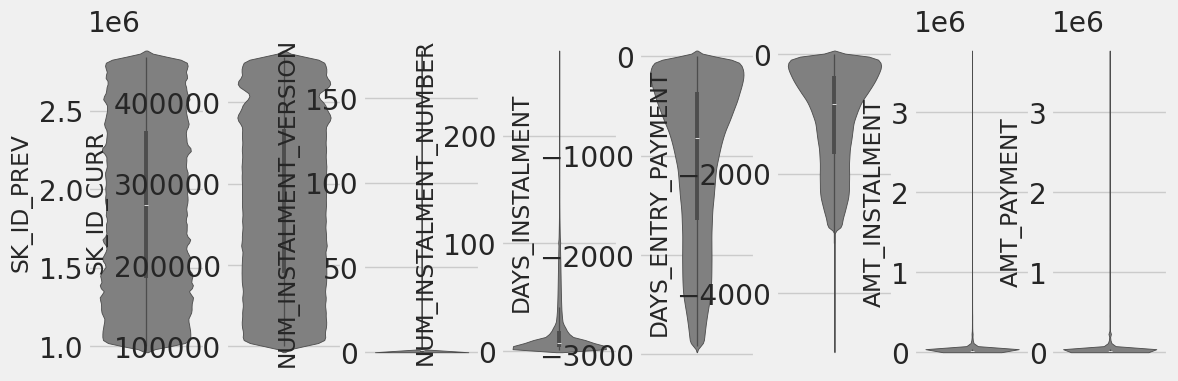

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Dari gambar violin plot di atas, berikut adalah analisis distribusi masing-masing kolom:<br>

SK_ID_PREV dan SK_ID_CURR:<br>
Violin plot untuk kedua kolom ini menunjukkan distribusi yang merata dan simetris, yang berarti ID-ID tersebut tersebar dengan baik di seluruh dataset.<br>
Tidak ada yang perlu di-follow up lebih lanjut karena kolom ini bersifat sebagai identifier.<br>

NUM_INSTALMENT_VERSION:<br>
Distribusi sangat skewed ke kiri dengan mayoritas nilai berada di rentang bawah (mendekati nol). Ada beberapa outlier di bagian kanan.<br>
Follow-up: Lakukan analisis outlier untuk mengetahui apakah versi installment yang lebih tinggi ini valid atau anomali.<br>

NUM_INSTALMENT_NUMBER:<br>
Distribusi skewed ke kiri dengan sebagian besar nilai mendekati nol, mirip dengan distribusi pada NUM_INSTALMENT_VERSION. Ada beberapa outlier di sebelah kanan.<br>
Follow-up: Outlier ini perlu diperiksa lebih lanjut, terutama jika ada beberapa nilai yang sangat tinggi.<br>

DAYS_INSTALMENT:<br>
Distribusi violin plot menunjukkan rentang nilai yang luas dengan dua puncak utama (bimodal distribution), yang berarti ada dua kelompok utama dalam data ini.<br>
Follow-up: Pemisahan kelompok ini dapat dilakukan untuk memahami karakteristik dari kedua kelompok tersebut.<br>

DAYS_ENTRY_PAYMENT:<br>
Distribusi mirip dengan DAYS_INSTALMENT, dengan puncak yang terpusat di sekitar nilai 0 dan bagian lain terdistribusi negatif.<br>
Follow-up: Lakukan eksplorasi lebih lanjut untuk melihat apakah puncak tersebut terkait dengan hari pembayaran yang tepat waktu versus keterlambatan pembayaran.<br>

AMT_INSTALMENT dan AMT_PAYMENT:<br>
Distribusi skewed ke kanan (positively skewed) dengan sebagian besar nilai berada di kisaran rendah. Ada beberapa outlier di bagian atas.<br>
Follow-up: Normalisasi atau transformasi data untuk menangani skewness, serta analisis outlier untuk mengetahui apakah data tersebut valid.<br>

Rekomendasi Pre-Processing:<br>
Lakukan analisis outlier lebih mendalam pada kolom NUM_INSTALMENT_VERSION, NUM_INSTALMENT_NUMBER, AMT_INSTALMENT, dan AMT_PAYMENT.<br>
Pertimbangkan transformasi data untuk mengurangi skewness, terutama pada kolom dengan distribusi yang skewed ke kanan.<br>
Lakukan eksplorasi tambahan pada distribusi bimodal di kolom DAYS_INSTALMENT dan DAYS_ENTRY_PAYMENT untuk memahami perbedaan karakteristik dari dua kelompok tersebut.<br>

## Kesimpulan Univariate Analysis<br>

Berdasarkan tiga grafik yang telah dianalisis, berikut adalah kesimpulan yang dapat diambil:

1. **Distribusi Skewed dan Outlier**:<br>
   - Sebagian besar kolom pada dataset menunjukkan distribusi yang skewed (cenderung tidak simetris) dengan banyaknya nilai yang mendekati nol. Hal ini terutama terlihat pada kolom seperti **NUM_INSTALMENT_VERSION**, **NUM_INSTALMENT_NUMBER**, **AMT_INSTALMENT**, dan **AMT_PAYMENT**.<br>
   - Terdapat beberapa outlier pada kolom numerik, terutama pada jumlah installment dan pembayaran. Outlier ini perlu diperhatikan lebih lanjut karena dapat memengaruhi hasil analisis dan model prediksi jika digunakan pada machine learning.<br>

2. **Karakteristik Temporal yang Bimodal**:<br>
   - Kolom **DAYS_INSTALMENT** dan **DAYS_ENTRY_PAYMENT** menunjukkan distribusi bimodal (dua puncak), yang mengindikasikan adanya dua kelompok utama dalam dataset. Salah satu puncak cenderung mendekati 0, yang mungkin merepresentasikan pembayaran yang dilakukan tepat waktu atau mendekati tanggal jatuh tempo.<br>
   - Kedua puncak ini perlu dianalisis lebih lanjut untuk memahami apakah ada perbedaan karakteristik dalam kedua kelompok ini, seperti misalnya keterlambatan pembayaran atau pengelompokan jenis nasabah.<br>

3. **Persebaran Identifikasi yang Merata**:<br>
   - Kolom ID seperti **SK_ID_PREV** dan **SK_ID_CURR** memiliki distribusi yang merata tanpa ada outlier, menunjukkan bahwa ID-ID ini tersebar dengan baik di seluruh dataset. Kolom ini tidak memberikan informasi tambahan terkait analisis distribusi selain sebagai penanda unik setiap transaksi.<br>

**Rekomendasi Pre-Processing**:<br>
- **Outlier Treatment**: Outlier pada beberapa kolom seperti **AMT_INSTALMENT**, **AMT_PAYMENT**, dan **NUM_INSTALMENT_NUMBER** perlu diatasi dengan teknik seperti clipping atau memeriksa data sumber untuk memvalidasi nilai-nilai ekstrem tersebut.<br>
- **Handling Skewness**: Kolom dengan distribusi skewed dapat diatasi dengan transformasi data seperti log-transform atau scaling untuk mengurangi ketidakseimbangan distribusi.<br>
- **Analisis Bimodal**: Kolom dengan distribusi bimodal perlu dianalisis lebih dalam untuk melihat apakah ada pola atau segmen data yang berbeda di antara kedua puncak distribusi ini.<br>

Kesimpulannya, grafik-grafik ini menunjukkan bahwa dataset memiliki tantangan dalam bentuk distribusi skewed, outlier, dan adanya bimodal distribution yang memerlukan perlakuan khusus selama proses data pre-processing.<br>

# 3. Multivariate Analysis (10 Poin)

In [ ]:
data[nums].corr()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,1.000000,0.002132,0.000685,-0.002095,0.003748,0.003734,0.002042,0.001887
SK_ID_CURR,0.002132,1.000000,0.000480,-0.000548,0.001191,0.001215,-0.000226,-0.000124
NUM_INSTALMENT_VERSION,0.000685,0.000480,1.000000,-0.323414,0.130244,0.128124,0.168109,0.177176
NUM_INSTALMENT_NUMBER,-0.002095,-0.000548,-0.323414,1.000000,0.090286,0.094305,-0.089640,-0.087664
DAYS_INSTALMENT,0.003748,0.001191,0.130244,0.090286,1.000000,0.999491,0.125985,0.127018
DAYS_ENTRY_PAYMENT,0.003734,0.001215,0.128124,0.094305,0.999491,1.000000,0.125555,0.126602
AMT_INSTALMENT,0.002042,-0.000226,0.168109,-0.089640,0.125985,0.125555,1.000000,0.937191
AMT_PAYMENT,0.001887,-0.000124,0.177176,-0.087664,0.127018,0.126602,0.937191,1.000000


<Axes: >

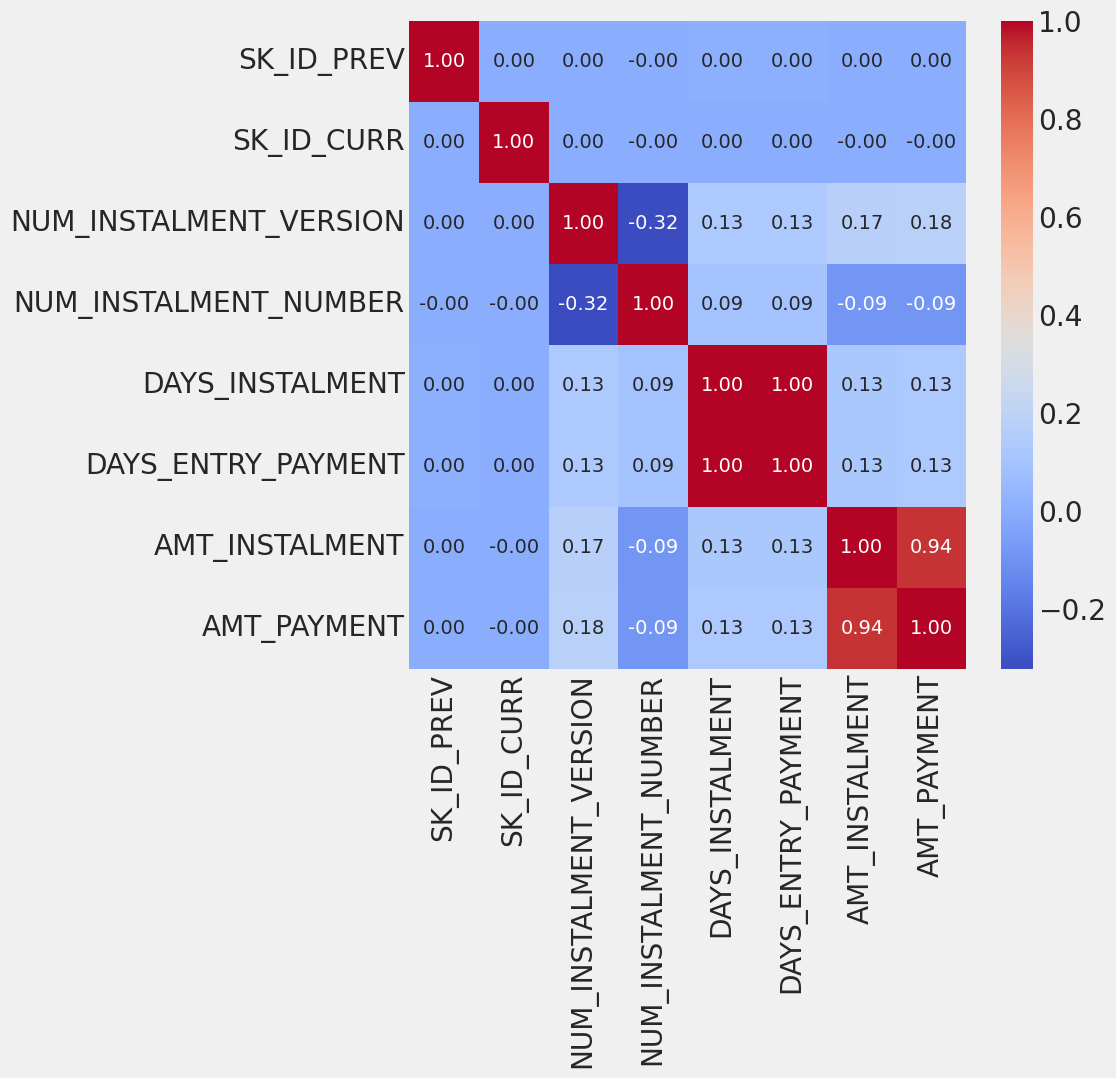

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f')


# 3A Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
## Korelasi yang Signifikan:<br>
AMT_INSTALMENT dan AMT_PAYMENT (korelasi 0.94):<br>
Korelasi yang sangat tinggi menunjukkan bahwa kedua fitur ini memiliki hubungan yang kuat satu sama lain. Biasanya, nilai angsuran dan pembayaran akan saling berkaitan. Kedua fitur ini sangat penting dan **harus dipertahankan**.<br>

DAYS_INSTALMENT dan DAYS_ENTRY_PAYMENT (korelasi ~1.00):<br>
Korelasi sempurna (1.00) menunjukkan bahwa kedua fitur ini hampir identik atau memberikan informasi yang sama. Dalam kasus seperti ini, Anda bisa memilih untuk menghapus salah satu dari kedua fitur ini untuk menghindari redundansi, tergantung pada konteks bisnis. Jika Anda perlu **mempertahankan salah satu**, pilih fitur yang lebih masuk akal secara bisnis.<br>

NUM_INSTALMENT_VERSION dan NUM_INSTALMENT_NUMBER (korelasi -0.32):<br>
Korelasi negatif ini menunjukkan bahwa ada hubungan yang lemah antara versi angsuran dan nomor angsuran. Meskipun demikian, kedua fitur ini tetap relevan karena mereka mewakili informasi diskrit terkait dengan urutan atau tahapan angsuran yang mungkin penting dalam analisis pembayaran.<br>

## Fitur dengan Korelasi Rendah:<br>

SK_ID_PREV dan SK_ID_CURR:<br>
Korelasi antara kedua ID ini dan fitur lainnya mendekati 0, yang menunjukkan bahwa mereka tidak memiliki hubungan yang signifikan dengan fitur lain. Meskipun penting untuk identifikasi, fitur-fitur ini tidak relevan untuk analisis korelasi atau prediksi, sehingga dapat dipertimbangkan untuk tidak digunakan dalam pemodelan.<br>

NUM_INSTALMENT_NUMBER:<br>
Korelasi dengan fitur lain relatif rendah (-0.09 hingga 0.13), tetapi fitur ini tetap penting karena mewakili nomor angsuran spesifik. Ini bisa berguna dalam memahami pola pembayaran dari waktu ke waktu.<br>


## Kesimpulan:<br>
Fitur yang paling relevan dan harus **dipertahankan** untuk analisis lebih lanjut adalah:<br>
1. AMT_INSTALMENT dan AMT_PAYMENT (karena korelasinya yang sangat tinggi dan relevansi bisnis).<br>
2. Salah satu dari DAYS_INSTALMENT atau DAYS_ENTRY_PAYMENT (karena korelasinya yang hampir identik, pilih salah satu).<br>
3. NUM_INSTALMENT_VERSION dan NUM_INSTALMENT_NUMBER (karena relevansi diskrit terkait angsuran).<br>

Fitur yang dapat dipertimbangkan untuk **diabaikan** dalam analisis prediktif (tetapi mungkin penting untuk identifikasi unik):<br>
**SK_ID_PREV** dan **SK_ID_CURR** (karena korelasinya rendah dan hanya penting untuk keperluan identifikasi).<br>





# 3B Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
<br>
Dari heatmap korelasi yang telah disediakan, berikut adalah analisis lebih lanjut mengenai korelasi antar-feature dan tindakan yang mungkin perlu diambil terhadap fitur-fitur tersebut.<br>

## Pola yang Menarik di Korelasi Antar-Feature:<br>
AMT_INSTALMENT dan AMT_PAYMENT (korelasi 0.94):<br>
Polanya: Ini menunjukkan hubungan yang sangat kuat antara jumlah angsuran yang dijadwalkan dan jumlah yang benar-benar dibayar. Biasanya, semakin besar angsuran yang dijadwalkan, semakin besar jumlah pembayaran.<br>
Tindakan: Meskipun korelasi tinggi, kedua fitur ini penting dan relevan untuk dianalisis lebih lanjut karena mewakili dua metrik yang berbeda (anggaran vs realisasi). Jadi, keduanya tetap dipertahankan dalam analisis dan model prediksi.<br>

DAYS_INSTALMENT dan DAYS_ENTRY_PAYMENT (korelasi ~1.00):<br>
Polanya: Kedua fitur ini memiliki korelasi yang hampir sempurna, yang menunjukkan bahwa mereka mungkin mengandung informasi yang sangat mirip atau bahkan identik. Biasanya, salah satu dari kedua fitur ini bisa dihapus karena redundansi.<br>
Tindakan: Pilih salah satu dari keduanya. Anda dapat mempertahankan yang lebih relevan secara bisnis, misalnya, DAYS_ENTRY_PAYMENT jika Anda lebih tertarik pada waktu aktual pembayaran dibandingkan dengan jadwal aslinya.<br>

NUM_INSTALMENT_VERSION dan NUM_INSTALMENT_NUMBER (korelasi -0.32):<br>
Polanya: Korelasi negatif ini menarik karena menunjukkan bahwa semakin besar versi angsuran, semakin kecil nomor angsurannya, meskipun korelasinya tidak terlalu kuat. Mungkin ini menunjukkan pola pembiayaan yang lebih kompleks untuk versi-versi angsuran yang lebih tinggi.<br>
Tindakan: Fitur ini dapat tetap dipertahankan karena meskipun korelasinya tidak kuat, informasi tentang versi angsuran dan nomor angsuran sering kali penting dalam analisis pembayaran jangka panjang atau multi-versi.<br>

SK_ID_PREV dan SK_ID_CURR (korelasi ~0):<br>
Polanya: Korelasi yang sangat rendah dengan semua fitur lain menunjukkan bahwa kedua fitur ini tidak memiliki hubungan linear yang kuat dengan fitur lain. Ini wajar karena fitur-fitur ini adalah ID unik yang hanya berfungsi sebagai pengenal dan tidak memiliki makna numerik yang relevan dalam prediksi.<br>
Tindakan: Fitur ini bisa diabaikan dalam model prediksi karena mereka tidak memberikan informasi prediktif. Namun, tetap dipertahankan untuk keperluan identifikasi.<br>

# Kesimpulan Tindakan untuk Antar-Fitur:<br>
**Pertahankan:**<br>
AMT_INSTALMENT dan AMT_PAYMENT karena meskipun korelasinya tinggi, keduanya penting dalam konteks bisnis dan analisis keuangan.<br>
NUM_INSTALMENT_VERSION dan NUM_INSTALMENT_NUMBER meskipun korelasinya rendah, namun keduanya memberikan informasi diskrit yang relevan.<br>

**Hapus salah satu:**<br>
Antara DAYS_INSTALMENT dan DAYS_ENTRY_PAYMENT, pilih salah satu fitur untuk menghindari multikolinearitas, karena keduanya hampir identik.<br>

**Pertimbangkan untuk diabaikan dalam pemodelan prediktif:**<br>
SK_ID_PREV dan SK_ID_CURR, karena mereka hanya penting untuk identifikasi unik dan tidak memiliki korelasi atau kontribusi prediktif.<br>

# Langkah Selanjutnya:<br>
Multikolinearitas: Jika Anda membuat model prediksi, menghapus fitur yang sangat berkorelasi seperti DAYS_INSTALMENT dan DAYS_ENTRY_PAYMENT dapat membantu menghindari multikolinearitas yang dapat mempengaruhi performa model.<br>
Feature Engineering: Pertimbangkan membuat fitur baru berdasarkan kombinasi fitur, seperti menghitung selisih antara AMT_INSTALMENT dan AMT_PAYMENT untuk melihat apakah pembayaran lebih rendah dari angsuran yang dijadwalkan, yang mungkin berguna dalam prediksi keterlambatan pembayaran atau default.

# 4. Business Insight

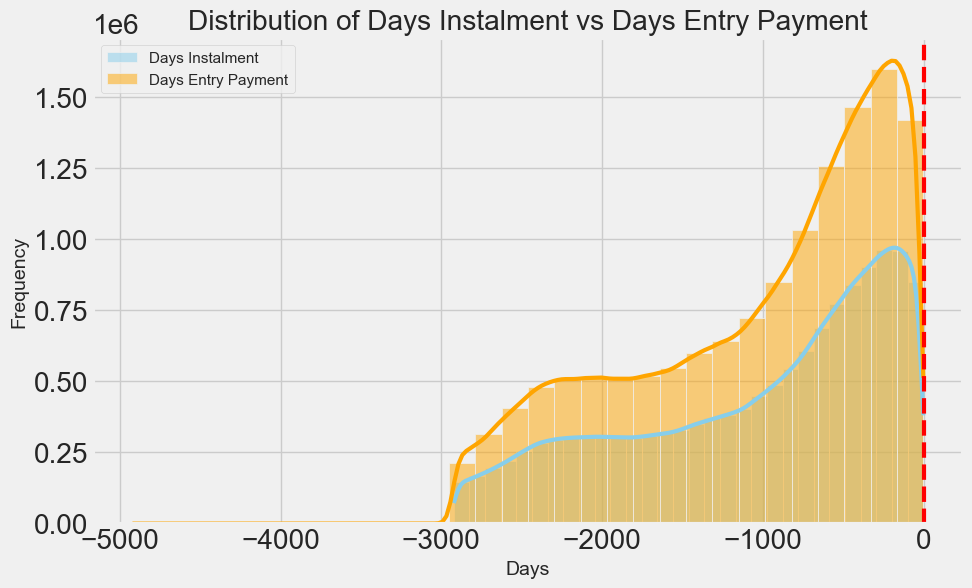

In [ ]:
# 1. Distribution of Days Instalment vs Days Entry Payment
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='DAYS_INSTALMENT', bins=30, color='skyblue', label='Days Instalment', kde=True)
sns.histplot(data=data, x='DAYS_ENTRY_PAYMENT', bins=30, color='orange', label='Days Entry Payment', kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution of Days Instalment vs Days Entry Payment')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.legend()
plt.show()



### Business Insight Berdasarkan Gambar Distribusi `Days Instalment` vs `Days Entry Payment`<br>

1. **Pola Pembayaran Lebih Awal dari Jatuh Tempo:**<br>

   - Dari grafik di atas, terlihat bahwa mayoritas distribusi `Days Entry Payment` (garis oranye) berada di sebelah kiri dari nilai 0, yang berarti sebagian besar pembayaran dilakukan lebih awal dari tanggal jatuh tempo (`Days Instalment`).<br>

   - Hal ini menunjukkan bahwa sebagian besar nasabah memiliki kebiasaan membayar cicilan sebelum jatuh tempo, yang mengindikasikan kepercayaan dan kemampuan finansial yang baik untuk memenuhi kewajiban cicilan.<br>


2. **Sebagian Pembayaran Tepat Waktu atau Terlambat:**<br>

   - Pada distribusi `Days Entry Payment`, terdapat beberapa area yang tumpang tindih dengan garis vertikal merah di titik 0, yang mengindikasikan bahwa ada nasabah yang membayar tepat pada tanggal jatuh tempo (`Days Instalment`).<br>

   - Namun, hanya sedikit pembayaran yang terjadi di sebelah kanan dari garis merah (nilai positif pada `Days Entry Payment`), yang berarti hanya segelintir nasabah yang melakukan pembayaran setelah jatuh tempo (telat bayar).<br>


3. **Business Insight**:<br>

   - **Promosikan Program Pembayaran Tepat Waktu atau Lebih Awal:**<br>

     - Mengingat sebagian besar nasabah cenderung membayar lebih awal, perusahaan dapat mempertimbangkan untuk menawarkan program loyalitas atau insentif bagi nasabah yang selalu membayar lebih awal, misalnya potongan suku bunga atau hadiah tambahan.<br>

   
   - **Komunikasi Aktif untuk Nasabah dengan Pembayaran Tepat Waktu atau Terlambat:**<br>

     - Untuk nasabah yang membayar tepat waktu atau terlambat, perlu dilakukan upaya komunikasi tambahan, seperti pengingat pembayaran otomatis sebelum tanggal jatuh tempo untuk memastikan pembayaran tepat waktu.<br>


4. **Analisis Lebih Lanjut:**<br>

   - Lakukan segmentasi pada nasabah berdasarkan `Days Entry Payment` untuk memahami karakteristik nasabah yang membayar lebih awal, tepat waktu, atau terlambat, sehingga strategi komunikasi dan penawaran produk bisa lebih terfokus.<br>


Dengan memahami pola distribusi ini, perusahaan dapat merancang strategi komunikasi dan program loyalitas yang lebih efektif untuk meningkatkan keterlibatan dan retensi nasabah.

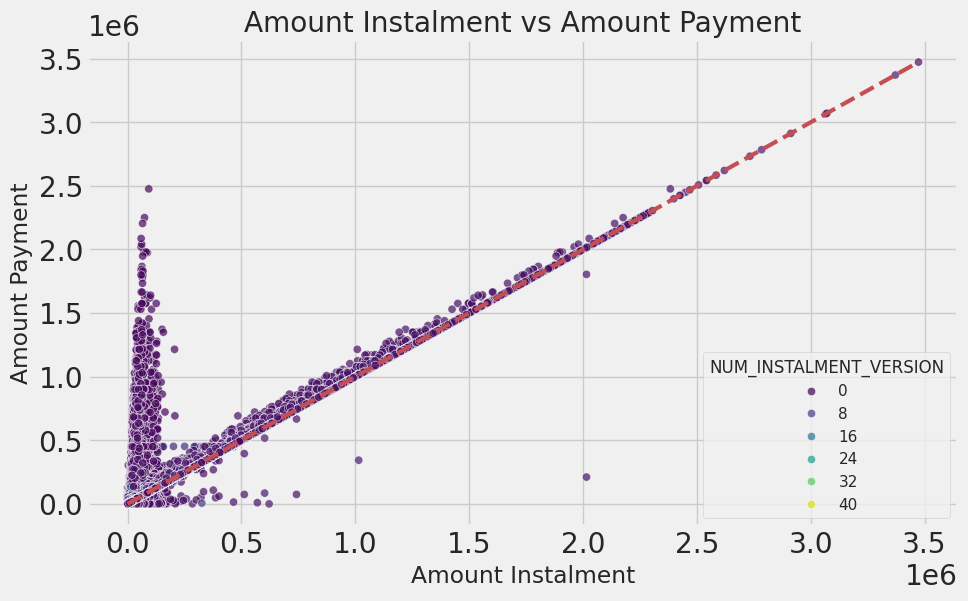

In [5]:
# 2. Scatter plot of Amount Instalment vs Amount Payment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AMT_INSTALMENT', y='AMT_PAYMENT', hue='NUM_INSTALMENT_VERSION', palette='viridis', alpha=0.7)
plt.title('Amount Instalment vs Amount Payment')
plt.xlabel('Amount Instalment')
plt.ylabel('Amount Payment')
plt.plot([0, data['AMT_INSTALMENT'].max()], [0, data['AMT_PAYMENT'].max()], 'r--')  # Diagonal reference line
plt.show()

### Business Insight Berdasarkan Grafik `Amount Instalment vs Amount Payment`

1. **Hubungan Positif yang Kuat antara Amount Instalment dan Amount Payment**:
   - Grafik scatter plot menunjukkan bahwa terdapat hubungan positif yang kuat antara `Amount Instalment` (jumlah cicilan yang dijadwalkan) dan `Amount Payment` (jumlah pembayaran aktual).
   - Sebagian besar titik data berada di garis diagonal merah (garis referensi), yang menunjukkan bahwa mayoritas pembayaran sesuai dengan jumlah cicilan yang dijadwalkan.
   - Ini mengindikasikan bahwa nasabah umumnya membayar penuh jumlah cicilan yang dijadwalkan tanpa ada kekurangan pembayaran.

2. **Pembayaran dengan Jumlah Lebih Rendah dari Jumlah Cicilan**:
   - Terdapat beberapa titik yang berada di bawah garis referensi diagonal, yang berarti jumlah pembayaran lebih rendah dari jumlah cicilan yang dijadwalkan.
   - Kasus ini dapat mengindikasikan bahwa nasabah melakukan pembayaran sebagian (partial payment) atau mungkin mengalami kesulitan finansial dalam melunasi cicilan penuh.
   - Jumlah cicilan yang lebih rendah ini perlu mendapat perhatian karena bisa menjadi tanda awal potensi gagal bayar (default).

3. **Cluster pada Pembayaran dengan Nilai Cicilan Rendah**:
   - Terlihat beberapa cluster yang padat di dekat sumbu y (Amount Payment), terutama ketika `Amount Instalment` bernilai sangat rendah (dekat 0).
   - Ini dapat menunjukkan adanya nasabah yang memiliki cicilan dengan nominal kecil, kemungkinan berupa cicilan biaya administrasi, denda, atau cicilan nominal rendah lainnya. Pola ini juga bisa terjadi karena ada skema pembayaran awal dengan cicilan rendah di awal periode.

### Rekomendasi Bisnis:
1. **Identifikasi Nasabah dengan Pembayaran Tidak Lengkap**:
   - Lakukan analisis lebih lanjut pada nasabah yang sering membayar di bawah jumlah cicilan yang dijadwalkan untuk memahami alasan di balik pembayaran parsial.
   - Buat program restrukturisasi cicilan atau tawarkan opsi pembayaran yang lebih fleksibel untuk mencegah nasabah tersebut jatuh ke kategori default.

2. **Segmentasi Nasabah Berdasarkan Kebiasaan Pembayaran**:
   - Segmen nasabah yang selalu membayar penuh dan tepat waktu untuk program loyalitas atau reward seperti pengurangan suku bunga atau cashback.
   - Untuk nasabah yang sering membayar lebih rendah dari jumlah cicilan yang dijadwalkan, tawarkan komunikasi proaktif untuk membantu mereka memenuhi kewajiban cicilan.

3. **Tinjauan Kebijakan Kredit**:
   - Pertimbangkan untuk meninjau ulang kebijakan kredit dan cicilan, terutama pada kasus di mana nasabah memiliki cicilan dengan jumlah yang sangat rendah. Pastikan bahwa biaya administrasi dan cicilan minimum tidak memberatkan nasabah, sehingga mendorong pembayaran penuh.

Dengan menggunakan insight ini, perusahaan dapat mengoptimalkan strategi kredit dan pembayaran nasabah serta menjaga kualitas portofolio kredit yang sehat.

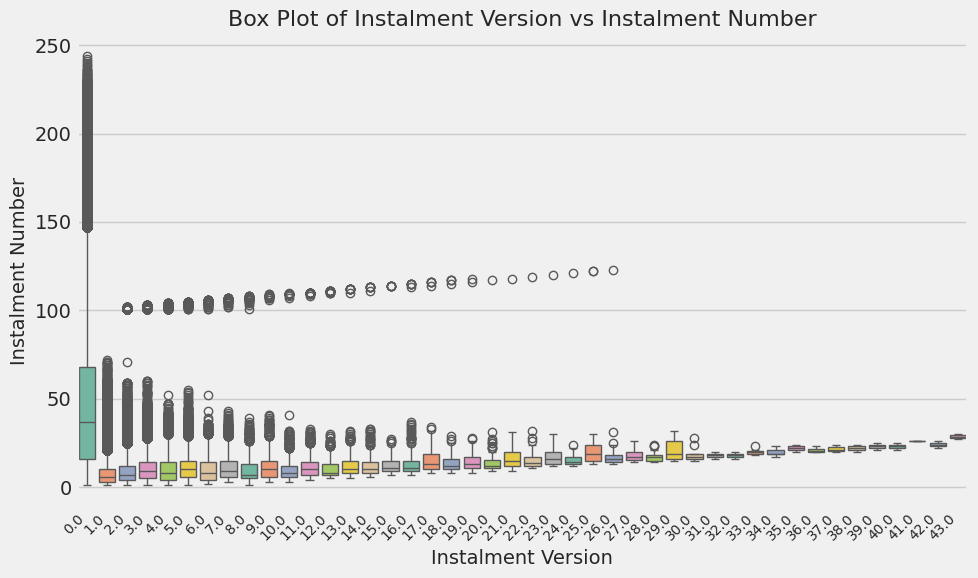

In [11]:
# 3. Box plot of Instalment Version vs Instalment Number
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='NUM_INSTALMENT_VERSION', y='NUM_INSTALMENT_NUMBER', palette='Set2')
plt.title('Box Plot of Instalment Version vs Instalment Number', fontsize=16)
plt.xlabel('Instalment Version', fontsize=14)
plt.ylabel('Instalment Number', fontsize=14)
# Adjust font size for x and y axis values (tick labels)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and set font size for x-axis tick labels
plt.yticks(fontsize=14)  # Set font size for y-axis tick labels

# Show the plot with tight layout to prevent overlapping
plt.tight_layout()
plt.show()

### Business Insight Berdasarkan Grafik `Instalment Version vs Instalment Number`

1. **Distribusi Instalment Number Berdasarkan Instalment Version:**
   - Grafik menunjukkan bahwa `Instalment Version` yang lebih rendah (seperti 0, 1, 2) cenderung memiliki rentang `Instalment Number` yang lebih besar, bahkan ada beberapa nasabah dengan `Instalment Number` yang mencapai lebih dari 100 kali cicilan.
   - Semakin tinggi `Instalment Version`, jumlah cicilan (`Instalment Number`) cenderung semakin kecil, yang berarti nasabah pada versi cicilan yang lebih baru atau lebih tinggi cenderung memiliki tenor cicilan yang lebih pendek.

2. **Variasi Jumlah Cicilan di Setiap Instalment Version:**
   - Pada `Instalment Version` 0 hingga 5, terdapat banyak variasi jumlah cicilan dengan persebaran yang lebih lebar, mengindikasikan bahwa nasabah memiliki fleksibilitas dalam memilih jumlah cicilan yang lebih beragam pada versi cicilan ini.
   - Mulai dari `Instalment Version` 10 ke atas, jumlah cicilan terlihat lebih seragam dan stabil dengan rentang yang lebih kecil. Ini bisa menunjukkan bahwa versi cicilan yang lebih baru telah distandarisasi atau ada pembatasan jumlah cicilan.

3. **Keberadaan Outlier pada Jumlah Cicilan yang Tinggi:**
   - Terdapat banyak outlier pada `Instalment Version` yang lebih rendah (0 hingga 5) di mana `Instalment Number` mencapai lebih dari 100 kali. Outlier ini bisa merepresentasikan nasabah dengan pinjaman jangka panjang atau skema cicilan yang tidak umum.
   - Outlier ini perlu dianalisis lebih lanjut karena bisa jadi merupakan nasabah yang memiliki komitmen finansial tinggi atau bisa jadi risiko default lebih tinggi karena lamanya tenor cicilan.

### Rekomendasi Bisnis:
1. **Standarisasi Jumlah Cicilan untuk Produk Cicilan Baru:**
   - Mengingat bahwa `Instalment Version` yang lebih tinggi cenderung memiliki jumlah cicilan yang lebih kecil dan lebih seragam, perusahaan dapat mempertimbangkan untuk menstandarisasi produk cicilan baru dengan jumlah cicilan yang lebih rendah untuk mengurangi risiko.
   
2. **Identifikasi Nasabah dengan Jumlah Cicilan Tinggi (Outlier):**
   - Analisis lebih lanjut diperlukan pada nasabah yang memiliki jumlah cicilan di atas rata-rata (outlier), terutama pada `Instalment Version` yang rendah. Nasabah ini mungkin memiliki risiko default lebih tinggi, sehingga perusahaan perlu memonitor secara lebih ketat atau menawarkan program refinancing.
   
3. **Penyesuaian Produk Berdasarkan Preferensi Nasabah:**
   - Dari persebaran ini terlihat bahwa nasabah cenderung memilih cicilan dengan jumlah yang lebih sedikit pada `Instalment Version` yang lebih tinggi. Ini dapat menjadi sinyal bagi perusahaan untuk menawarkan produk cicilan dengan tenor lebih pendek untuk menarik nasabah baru atau mempertahankan nasabah lama.

4. **Komunikasi dan Program Loyalitas:**
   - Berikan program loyalitas atau reward bagi nasabah pada `Instalment Version` yang lebih tinggi dengan jumlah cicilan yang rendah, karena mereka mungkin lebih mampu membayar tepat waktu dan menyelesaikan kewajiban dengan lebih cepat.

Dengan memahami pola distribusi dan outlier pada masing-masing versi cicilan, perusahaan dapat merancang strategi yang lebih sesuai untuk segmentasi nasabah dan penawaran produk keuangan.

### Kesimpulan dari Ketiga Business Insight <br>

Berdasarkan analisis dari ketiga visualisasi, berikut adalah kesimpulan utama dan rekomendasi strategis yang dapat diambil:<br>

1. **Analisis Perilaku Pembayaran Secara Keseluruhan**:<br>
   - **Insight**: Mayoritas nasabah cenderung membayar cicilan mereka tepat waktu atau bahkan lebih awal dari tanggal jatuh tempo. Hal ini menunjukkan bahwa nasabah memiliki perilaku keuangan yang baik dan bertanggung jawab.<br>
   - **Rekomendasi**: Buat program loyalitas atau tawarkan insentif seperti pengurangan suku bunga bagi nasabah yang konsisten melakukan pembayaran lebih awal. Ini dapat mendorong nasabah untuk terus membayar tepat waktu dan memperkuat hubungan dengan nasabah.<br>

2. **Korelasi Antara Jumlah Cicilan dan Jumlah Pembayaran**:
   - **Insight**: Terdapat korelasi positif yang kuat antara jumlah cicilan yang dijadwalkan dengan jumlah pembayaran aktual. Namun, ada beberapa nasabah yang sering membayar di bawah jumlah cicilan yang dijadwalkan, yang mengindikasikan adanya potensi kesulitan keuangan.<br>
   - **Rekomendasi**: Segmentasi nasabah berdasarkan perilaku pembayaran mereka. Lakukan komunikasi proaktif dan tawarkan solusi yang disesuaikan (misalnya, program refinancing atau fleksibilitas pembayaran) bagi nasabah yang mengalami kesulitan membayar. Langkah ini dapat membantu mencegah terjadinya gagal bayar dan menjaga portofolio kredit yang sehat.<br>

3. **Analisis Versi Cicilan vs Jumlah Cicilan**:<br>
   - **Insight**: Versi cicilan yang lebih rendah cenderung memiliki jumlah cicilan yang lebih tinggi dan bervariasi. Sebaliknya, versi cicilan yang lebih tinggi (produk cicilan yang lebih baru) cenderung memiliki jumlah cicilan yang lebih sedikit dan lebih seragam. Ini mengindikasikan adanya tren ke arah produk pinjaman dengan jangka waktu lebih pendek atau standar produk yang lebih ketat.<br>
   - **Rekomendasi**: Pertimbangkan untuk menawarkan produk cicilan baru dengan durasi yang lebih singkat, karena ini tampaknya lebih diminati oleh nasabah. Untuk nasabah dengan jumlah cicilan yang tinggi, lakukan peninjauan kembali dan restrukturisasi pinjaman agar lebih sesuai dengan kemampuan finansial mereka, guna mengurangi risiko gagal bayar.<br>
